In [9]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import squidpy as sq
import scanpy as sc

In [2]:
adata = sc.read_10x_h5(
    filename="/diskmnt/primary/Xenium/data/20230830__153957__20230830_24001/output-XETG00122__0010528__HT206B1-H2L1Us1_1__20230830__154053/cell_feature_matrix.h5"
)
 a

/diskmnt/Projects/Users/estorrs/miniconda3/envs/mushroom/lib/python3.9/site-packages/anndata/_core/anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):


AnnData object with n_obs × n_vars = 119855 × 377
    var: 'gene_ids', 'feature_types', 'genome'

In [27]:
df = pd.read_csv(
    "/diskmnt/primary/Xenium/data/20230830__153957__20230830_24001/output-XETG00122__0010528__HT206B1-H2L1Us1_1__20230830__154053/cells.csv.gz"
)
df = df.set_index('cell_id')

In [30]:
df['x_centroid'].max(), df['y_centroid'].max()

(5941.89990234375, 6500.79296875)

In [17]:
df = pd.read_csv(
    "/diskmnt/primary/Xenium/data/20230830__153957__20230830_24001/output-XETG00122__0010528__HT206B1-H2L1Us1_1__20230830__154053/transcripts.csv.gz"
)
df

,transcript_id,cell_id,overlaps_nucleus,feature_name,x_location,y_location,z_location,qv,fov_name,nucleus_distance
0,281642480436718,UNASSIGNED,0,CXCR4,35.829872,2903.6310,11.886365,40.000000,I4,520.05914
1,281642480436721,UNASSIGNED,0,CD14,150.863250,2899.5537,11.885179,40.000000,I4,424.27997
2,281642480442155,UNASSIGNED,0,CD3E,48.968124,2914.2870,11.771899,14.754089,I4,503.65097
3,281642480443211,UNASSIGNED,0,TFPI,177.562530,2956.0952,11.973631,40.000000,I4,386.97385
4,281642480444425,UNASSIGNED,0,MKI67,163.200350,2997.9617,12.140148,40.000000,I4,370.69080
...,...,...,...,...,...,...,...,...,...,...
14285052,281724084832558,UNASSIGNED,0,UPK3B,6041.239700,4525.5540,15.148323,15.294637,K13,297.84280
14285053,281724084829414,UNASSIGNED,0,GPRC5A,6031.864700,4858.6714,14.882718,20.969868,K13,397.54822
14285054,281724084829735,UNASSIGNED,0,IL7R,6020.936000,4872.9473,14.665897,21.015833,K13,385.69217
14285055,281724084836390,UNASSIGNED,0,RTKN2,6009.527000,4793.7266,15.060142,40.000000,K13,386.45260


In [18]:
df[df['cell_id']!='UNASSIGNED']

,transcript_id,cell_id,overlaps_nucleus,feature_name,x_location,y_location,z_location,qv,fov_name,nucleus_distance
228,281642480442157,kcmjdmgf-1,1,ESR1,56.590405,3515.1160,11.582922,40.000000,I4,0.000000
241,281642480453813,kcmjdmgf-1,1,RTKN2,57.322500,3514.1218,13.725247,11.705769,I4,0.000000
246,281642480454853,kcmjdmgf-1,0,CAVIN1,44.420967,3509.4973,11.659388,40.000000,I4,11.771505
250,281642480455788,kcmjdmgf-1,1,ACTG2,57.254250,3514.4114,12.018178,38.452570,I4,0.000000
258,281642480459175,kcmjdmgf-1,0,GNG11,62.431015,3510.5469,12.733532,32.105400,I4,4.655292
...,...,...,...,...,...,...,...,...,...,...
14284581,281724084828082,melhpefd-1,0,BANK1,5750.932600,4411.9023,17.478956,40.000000,K13,11.618243
14284591,281724084832213,melhpefd-1,0,LILRA4,5751.915500,4412.2510,18.011896,40.000000,K13,12.161602
14284595,281724084835455,melhpefd-1,0,CAVIN2,5764.464400,4397.6577,15.381452,40.000000,K13,14.639160
14284599,281724084837237,melhpefd-1,0,CD1C,5750.848000,4415.2840,15.815664,40.000000,K13,14.939918


In [20]:
set(df['fov_name'])

{'E10',
 'E11',
 'E12',
 'E5',
 'E6',
 'E7',
 'E8',
 'E9',
 'F10',
 'F11',
 'F12',
 'F13',
 'F5',
 'F6',
 'F7',
 'F8',
 'F9',
 'G10',
 'G11',
 'G12',
 'G13',
 'G5',
 'G6',
 'G7',
 'G8',
 'G9',
 'H10',
 'H11',
 'H12',
 'H13',
 'H5',
 'H6',
 'H7',
 'H8',
 'H9',
 'I10',
 'I11',
 'I12',
 'I13',
 'I4',
 'I5',
 'I6',
 'I7',
 'I8',
 'I9',
 'J10',
 'J11',
 'J12',
 'J13',
 'J4',
 'J5',
 'J6',
 'J7',
 'J8',
 'J9',
 'K10',
 'K11',
 'K12',
 'K13',
 'K5',
 'K6',
 'K7',
 'K8',
 'K9',
 'L10',
 'L11',
 'L12',
 'L5',
 'L6',
 'L7',
 'L8',
 'L9',
 'M10',
 'M11',
 'M5',
 'M6'}

In [21]:
import json

In [26]:
# df = json.load(open(
#     "/diskmnt/primary/Xenium/data/20230830__153957__20230830_24001/output-XETG00122__0010528__HT206B1-H2L1Us1_1__20230830__154053/aux_outputs/fov_locations.json"
# ))
# df

In [ ]:
"/diskmnt/primary/Xenium/data/20230830__153957__20230830_24001/output-XETG00122__0010528__HT206B1-H2L1Us1_1__20230830__154053/analysis/"


In [23]:
tf = tifffile.TiffFile("/diskmnt/primary/Xenium/data/20230830__153957__20230830_24001/output-XETG00122__0010528__HT206B1-H2L1Us1_1__20230830__154053/morphology.ome.tif")
tf

<tifffile.TiffFile 'morphology.ome.tif'>

In [24]:
tf.ome_metadata

'<OME xmlns="http://www.openmicroscopy.org/Schemas/OME/2016-06" xmlns:xsi="http://www.w3.org/2001/XMLSchema-instance" Creator="tifffile.py 2022.10.10" UUID="urn:uuid:b910fe42-477c-11ee-9c3b-3cecefd5e522" xsi:schemaLocation="http://www.openmicroscopy.org/Schemas/OME/2016-06 http://www.openmicroscopy.org/Schemas/OME/2016-06/ome.xsd">\n    <Plate ID="Plate:1" WellOriginX="-0.0" WellOriginXUnit="µm" WellOriginY="-0.0" WellOriginYUnit="µm" />\n    <Instrument ID="Instrument:1">\n        <Microscope Manufacturer="10x Genomics" Model="Xenium" />\n    </Instrument>\n    <Image ID="Image:0" Name="Image0">\n        <InstrumentRef ID="Instrument:1" />\n        <Pixels DimensionOrder="XYZCT" ID="Pixels:0" SizeC="1" SizeT="1" SizeX="28484" SizeY="30729" SizeZ="12" Type="uint16" PhysicalSizeX="0.2125" PhysicalSizeY="0.2125" PhysicalSizeZ="3.0">\n            <Channel ID="Channel:0:0" Name="DAPI" SamplesPerPixel="1" />\n            <TiffData PlaneCount="12" />\n        </Pixels>\n    </Image>\n</OME>'

In [31]:
30729 * .21, 28484 * .21

(6453.09, 5981.639999999999)

In [4]:
adata.obsm["spatial"] = adata.obs[["x_centroid", "y_centroid"]].copy().to_numpy()


In [5]:
adata

AnnData object with n_obs × n_vars = 119855 × 377
    obs: 'x_centroid', 'y_centroid', 'transcript_counts', 'control_probe_counts', 'control_codeword_counts', 'unassigned_codeword_counts', 'deprecated_codeword_counts', 'total_counts', 'cell_area', 'nucleus_area'
    var: 'gene_ids', 'feature_types', 'genome'
    obsm: 'spatial'

/diskmnt/Projects/Users/estorrs/miniconda3/envs/mushroom/lib/python3.9/site-packages/squidpy/pl/_spatial_utils.py:747: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if c is not None and c in adata.obs and is_categorical_dtype(adata.obs[c]):
/diskmnt/Projects/Users/estorrs/miniconda3/envs/mushroom/lib/python3.9/site-packages/squidpy/pl/_spatial_utils.py:471: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(color_source_vector):
/diskmnt/Projects/Users/estorrs/miniconda3/envs/mushroom/lib/python3.9/site-packages/squidpy/pl/_spatial_utils.py:649: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(color_source_vector):


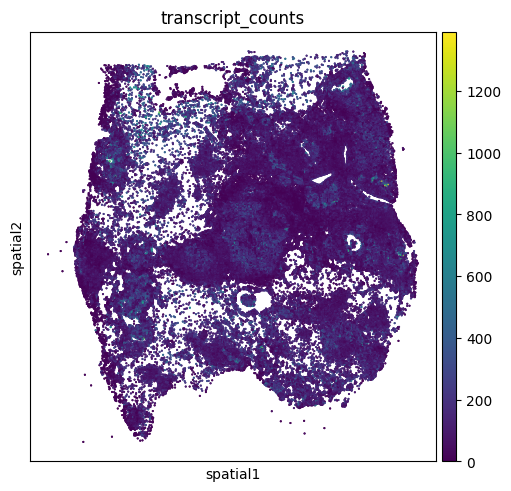

In [6]:
sq.pl.spatial_scatter(
    adata,
    library_id="spatial",
    shape=None,
    color=[
        "transcript_counts",
    ],
    wspace=0.4,
)

In [15]:
adata.obsm['spatial'].max(axis=0)

array([5941.89990234, 6500.79296875])

In [16]:
adata.obsm['spatial'].min(axis=0)

array([ 57.11101151, 282.30914307])

In [12]:
import tifffile
img = tifffile.imread(
    '/diskmnt/primary/Xenium/data/20230830__153957__20230830_24001/output-XETG00122__0010528__HT206B1-H2L1Us1_1__20230830__154053/morphology_focus.ome.tif'
).astype(np.uint8)
img.shape

(30729, 28484)

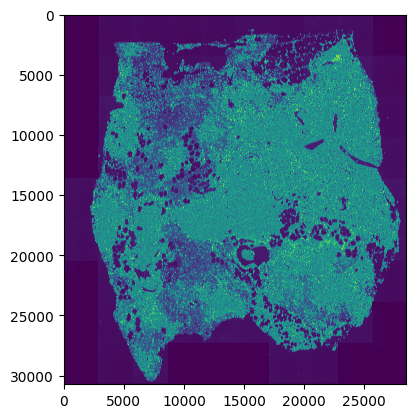

In [10]:
plt.imshow(img)

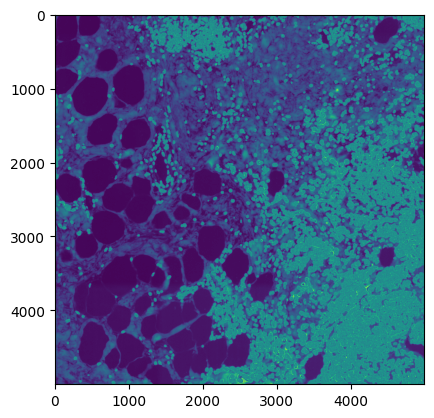

In [13]:
plt.imshow(img[10000:15000, 10000:15000])

In [ ]:
import tifffile
img = tifffile.imread(
    '/diskmnt/primary/Xenium/data/20230830__153957__20230830_24001/output-XETG00122__0010528__HT206B1-H2L1Us1_1__20230830__154053/morphology.ome.tif'
).astype(np.uint8)
img.shape

In [ ]:
img

In [ ]:
img = tifffile.imread('/diskmnt/primary/Xenium/data/20230830__153957__20230830_24001/output-XETG00122__0010528__HT206B1-H2L1Us1_1__20230830__154053/morphology.ome.tif')
img.shape

In [ ]:
a = sq.read.visium('/diskmnt/primary/Spatial_Transcriptomics/Spaceranger_pipeline/FFPE/spatial_transcriptomics/spaceranger_outputs/breast/HT397B1-S1H3A1U1/')
a